Пропуски:
 hash    0
ball    0
egkr    0
a1      0
a2      0
a3      0
ag      0
g1      0
g2      0
g3      0
gg      0
i1      0
i2      0
i3      0
ia      0
ig      0
f1      0
f2      0
f3      0
fa      0
fg      0
r1      0
r2      0
r3      0
ra      0
rg      0
pri     0
prm     0
prf     0
prr     0
dtype: int64


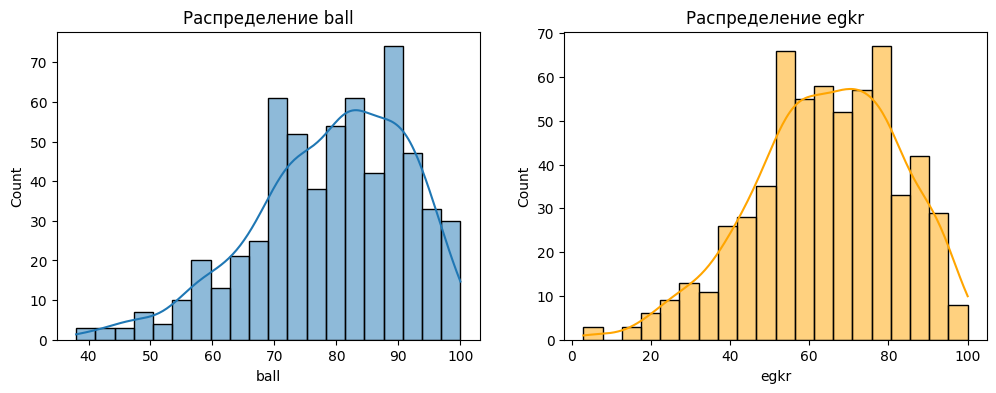

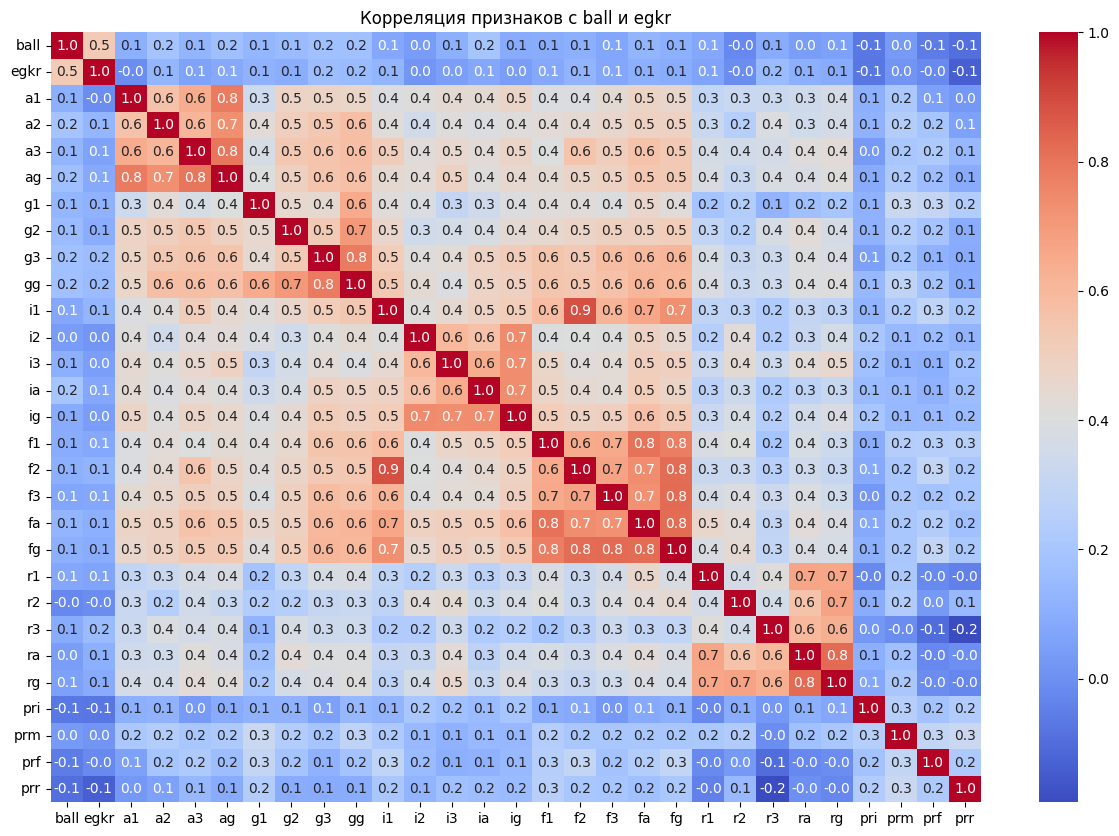

Linear Regression R²: 0.1041032190744996
Random Forest R²: 0.2791072095367617
Модель: Linear Regression
R²: 0.1041032190744996
MAE: 9.418095275003878
RMSE: 11.70787551885685
------
Модель: Random Forest
R²: 0.2791072095367617
MAE: 8.155228387773843
RMSE: 10.502300713131415
------


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(name, y_true, y_pred):
    print(f"Модель: {name}")
    print("R²:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("------")


df = pd.read_csv("super_new_dataset.csv", sep=';')

print("Пропуски:\n", df.isnull().sum())

# Заполнение пропусков медианой
df.fillna(df.median(numeric_only=True), inplace=True)

# Удаление дубликатов (но их точно нет)))
df = df.drop_duplicates(subset="hash")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df["ball"], bins=20, kde=True)
plt.title("Распределение ball")

plt.subplot(1, 2, 2)
sns.histplot(df["egkr"], bins=20, kde=True, color="orange")
plt.title("Распределение egkr")
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Корреляция признаков с ball и egkr")
plt.show()

X = df.drop(columns=["hash", "ball"])
y = df["ball"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

# Случайный лес
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)